## Distances Between Histograms of Programs (POJ 104)
---

### Installing the libraries

In [2]:
%pip install matplotlib
%pip install pandas
%pip install numpy

     |████████████████████████████████| 11.3 MB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 5.5 MB/s eta 0:00:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     |████████████████████████████████| 17.1 MB 6.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 6.4 MB/s eta 0:00:01
     |████████████████████████████████| 944 kB 6.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 11.7 MB 291 kB/s eta 0:00:01
  Using cached pytz-2022.1-py2.py3-none-any.whl (503 kB)
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Loading the libraries

In [3]:
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Loading the datasets

Name of Datasets

In [2]:
RESULTSFOLDER="../Volume/Csv/"

cloneGenStrategies = ["DRLSG", "GA", "MCMC", "OJClone", "RS"]
cloneGenDataset = {}

ollvmStrategies = ["OLLVM", "BCF", "FLA", "SUB"]
ollvmDataset = {}

Loading

In [ ]:
for name in cloneGenStrategies:
    cloneGenStrategies[name] = pd.read_csv(f"{RESULTSFOLDER}/features_{name}.csv", skipinitialspace=True)
    cloneGenStrategies[name].set_index('id')

for name in ollvmStrategies:
    ollvmStrategies[name] = pd.read_csv(f"{RESULTSFOLDER}/features_{name}.csv", skipinitialspace=True)
    ollvmStrategies[name].set_index('id')

o3 = pd.read_csv(f"{RESULTSFOLDER}/features_O3.csv", skipinitialspace=True)
o3 = o3.set_index('id')

o0 = pd.read_csv(f"{RESULTSFOLDER}/features_O0.csv", skipinitialspace=True)
o0 = o0.set_index('id')

### Datasets Normalization

##### Definitions

In [3]:
# Min-Max
def normMinMax(df):
    cout = 0
    for column in df.columns:
        if not (df[column].max() == 0 and df[column].min() == 0):
            dif = df[column].max() - df[column].min()
            df[column] = (df[column] - df[column].min())/dif
        print(f"Column {cout} calculated", end='\r')
        cout += 1
    return df

# Z-score 
def stnd(df):
    cout = 0
    for column in df.columns:
        if not (df[column].max() == 0 and df[column].min() == 0):
            mean = df[column].mean()
            df[column] = (df[column] - mean)/df[column].std()
        print(f"Column {cout} calculated", end='\r')
        cout += 1
    return df

# Percentual
def perc(df):
    cout = 0
    for column in df.columns:
        s = df[column].sum()
        if not (s == 0):
            df[column] = (df[column]/s)
        print(f"Column {cout} calculated", end='\r')
        cout += 1
    return df

In [ ]:
def normalization(name, df, funcNorm):
    print(f"Dataset: {name}")
    df = df.T
    dfc = df.loc['class']
    df = df.drop(['class'])

    df = funcNorm(df)
    df = df.concat(dfc)
    df = df.T
    return df

##### Normalization

In [4]:
o3 = normalization(o3, perc)

/tmp/ipykernel_268606/979317883.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  o3 = o3.append(o3c)


In [5]:
o0 = normalization(o0, perc)

/tmp/ipykernel_268606/3199222233.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  o0 = o0.append(o0c)


In [6]:
for name in ollvmStrategies:
   ollvmDataset[name] =  normalization(ollvmDataset[name], perc)

/tmp/ipykernel_268606/4026107826.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ollvm = ollvm.append(ollvmc)


In [ ]:
for name in cloneGenStrategies:
    cloneGenStrategies[name] = normalization(cloneGenDataset[name], perc)

### Collecting the distances between the programs of all classes
For instance, `o3Distances` is the distance between optimized and original programs.
`ollvmDistances` is the distance between obfuscated and original programs.

##### Functions

In [7]:
distances= {}

def getDistances(name, dataset):
    print(f"Dataset: {name}")
    i = 0
    for _, row in o0.loc[:, o0.columns != 'class'].iterrows():
        id = row.name
        original = row.to_numpy()

        if id in dataset.index:
            temp = dataset.loc[:, dataset.columns != 'class'].loc[id]
            otimized = temp.to_numpy()
            dist = np.linalg.norm(original - otimized)
            if not distances[name]:
                distances[name] = np.zeros(o0.shape[0])
            distances[name][i] = dist

        print("The index {} was successfully calculated".format(i), end='\r')
        i += 1

def getDistances(dataset):
    for name in dataset:
        print(f"Dataset: {name}")
        i = 0
        for _, row in o0.loc[:, o0.columns != 'class'].iterrows():
            id = row.name
            original = row.to_numpy()

            if id in dataset[name].index:
                temp = dataset[name].loc[:, dataset[name].columns != 'class'].loc[id]
                otimized = temp.to_numpy()
                dist = np.linalg.norm(original - otimized)
                if not distances[name]:
                    distances[name] = np.zeros(o0.shape[0])
                distances[name][i] = dist

            print("The index {} was successfully calculated".format(i), end='\r')
            i += 1

##### Distances

In [ ]:
getDistances("O0", o0)
getDistances("O3", o0)
getDistances(ollvmDataset)
getDistances(cloneGenDataset)

In [8]:
for key in distances:
    print("Sum of distances between the {} programs to original programs: {}".format(key, sum(distances[key])))

Sum of distances between the O3 programs to original programs: 15068.26545711683
Sum of distances between the OLLVM programs to original programs: 14134.144374899171


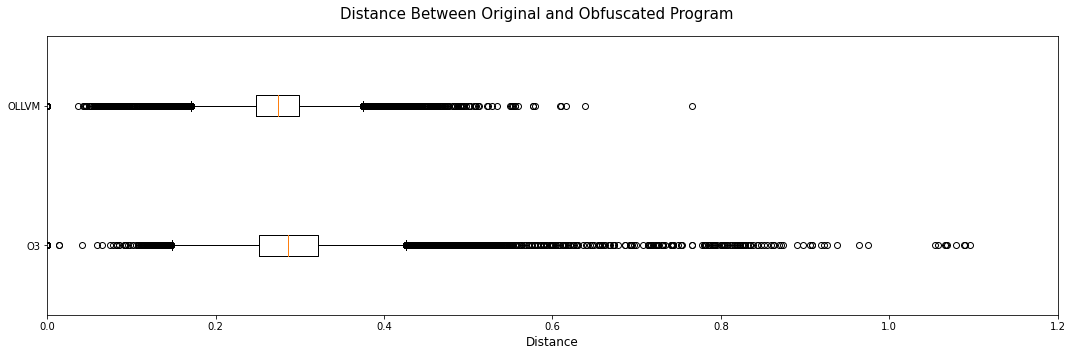

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))

fig.suptitle('Distance Between Original and Obfuscated Program', fontsize=15)
ax.boxplot(
    [distances[key] for key in distances], 
    vert=False, 
    showfliers=True,
    labels=(key for key in distances)
)
ax.set_xlabel("Distance", fontsize=12)
ax.set_xlim([0,1.2])

plt.savefig('pdfs/distance.pdf')
fig.tight_layout()

In [70]:
dfDistances = {}

for key in distances:
    dfDistances[key] = pd.Series(distances[key])

def countOutliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    return ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

for key in dfDistances:
    out = countOutliers(dfDistances[key])
    print("Number of outliers of OLLVM: {}".format(out.sum()))

Number of outliers of OLLVM: 1587
Number of outliers of O3: 1960
